This notebook explores the data related to NVIDIA within the FNSPID dataset.

# Imports and configurations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\mushj\Downloads\RAW FINANCE DATA\FNSPID_NVDA.csv")

# Format data

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.to_period('D').dt.to_timestamp()

C:\Users\mushj\AppData\Local\Temp\ipykernel_10876\3982233738.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['day'] = df['Date'].dt.to_period('D').dt.to_timestamp()


# Check missing values

In [4]:
df.isna().mean()

Date                0.000000
Article_title       0.000000
Stock_symbol        0.000000
Url                 0.000000
Publisher           0.734783
Author              1.000000
Article             0.265217
Lsa_summary         0.265217
Luhn_summary        0.265217
Textrank_summary    0.265217
Lexrank_summary     0.265217
day                 0.000000
dtype: float64

In [5]:
daily_titles = df.groupby('day').agg({'Article_title': lambda x: (~x.isna()).sum()})
daily_titles = daily_titles.reset_index()
daily_titles.describe()

,Article_title
count,2008.000000
mean,5.907371
std,8.290165
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,99.000000


In [6]:
daily_articles = df.groupby('day').agg({'Article': lambda x: (~x.isna()).sum()})
daily_articles = daily_articles.reset_index()
daily_articles.describe()

,Article
count,2008.000000
mean,4.340637
std,8.652714
min,0.000000
25%,0.000000
50%,0.000000
75%,6.000000
max,99.000000


In [7]:
# missing values in the context of the full date range
max_span_days = (df['day'].max() - df['day'].min()).days
n1 = df.day.nunique()
n2 = df.dropna(subset=['Article']).day.nunique()

print("Full range (days):", max_span_days)
print("Days with article titles:", n1, f"({np.round(n1/max_span_days*100, 2)}%)")
print("Days with article body:", n2, f"({np.round(n2/max_span_days*100, 2)}%)")

Full range (days): 4671
Days with article titles: 2008 (42.99%)
Days with article body: 811 (17.36%)


# Missing values distribution

In [8]:
# create DataFrame of dates that span the full date range
all_dates = pd.date_range(start=df['day'].min(), freq='D', periods=max_span_days)
all_dates_df = pd.DataFrame(all_dates, columns=['day'])
len(all_dates)

4671

In [9]:
# merge daily counts to all dates
counts_df = (
    all_dates_df
    .merge(daily_titles, on='day', how='left')
    .merge(daily_articles, on='day', how='left')
    .fillna(0)
)

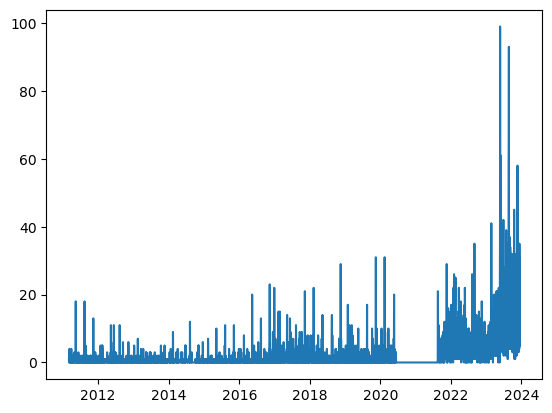

In [10]:
# gap during 'COVID period'
plt.plot(counts_df.day, counts_df.Article_title);

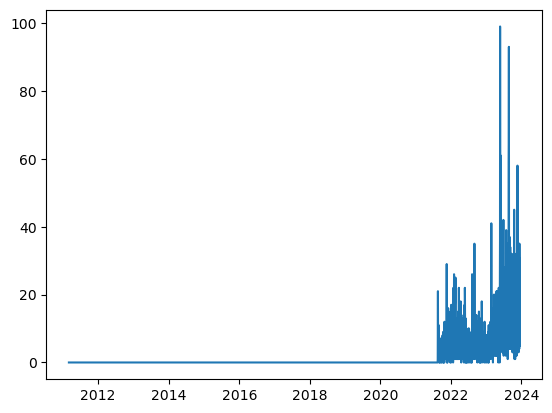

In [11]:
# no articles until end of 2021
plt.plot(counts_df.day, counts_df.Article);

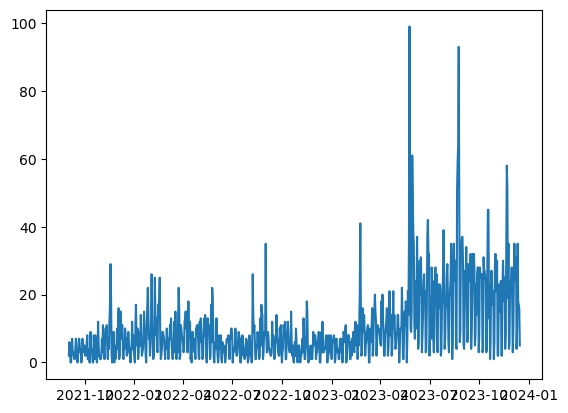

In [12]:
# ploting article counts after date
plot_df = counts_df[counts_df['day'] >= '2021-09-02']
plt.plot(plot_df.day, plot_df.Article);

In [13]:
plot_df.day.nunique()

835

# Titles

In [14]:
titles = df['Article_title'].dropna()

In [15]:
# show top 20 titles
for i in titles.iloc[:20]:
    print(i)

2 Potential AI Stock-Split Stocks to Keep an Eye On in the New Year
Can the 'Magnificent Seven' Continue to Lead the Market Higher in 2024?
Nvidia and AMD's Artificial Intelligence (AI) Battle Is Heating Up
2 Top-Rated Tech Stocks to Buy for 2024 Upside
Some Potential 2024 Winners Reside in QQQ, QQQM
4 Must-Buy Stocks to Benefit From AI Spending Boom in 2024
Alphabet (GOOGL) Boosts Google Cloud Offerings With Gemini Pro
5 Crypto-Centric Stocks to Buy for Stellar Returns in 2024
The Fed Pivot Arrives: The Magnificent Seven Should Benefit
Tech hedge funds soar, piggybacking on Nasdaq rally
3 Stocks You Can Confidently Buy After a Market Downturn
Should Vanguard S&P 500 Growth ETF (VOOG) Be on Your Investing Radar?
Nvidia Stock (NASDAQ:NVDA) Is Up 235% YTD; What Lies Ahead in 2024?
3 Stock-Split Stocks With 51% to 128% Upside in 2024, According to Select Wall Street Analysts
The Zacks Analyst Blog Highlights Meta Platforms, NVIDIA, Intel, ServiceNow and CrowdStrike
3 Best Stocks to Buy No

In [16]:
# summarize title lengths
titles.apply(len).describe()

count    11862.000000
mean        64.121733
std         29.940117
min         15.000000
25%         48.000000
50%         59.000000
75%         72.000000
max        382.000000
Name: Article_title, dtype: float64

# Articles

In [17]:
articles = df['Article'].dropna()

In [18]:
# show top 5 articles
for i in articles.iloc[:5]:
    print(i, '\n-----\n')

2023 has been the year of artificial intelligence (AI) stocks. The launch of OpenAI's ChatGPT in late 2022 set off a new race to harness generative AI technologies, which some tech CEOs think could be as transformative as the internet has been over the past three decades.
Stock splits, meanwhile, continue to get attention from investors after nearly every big tech stock split its shares in 2021 and 2022, including Tesla, Apple, Alphabet, Amazon, Nvidia (NASDAQ: NVDA), and Shopify. Stock splits don't do anything to change the fundamentals of a stock. They just divide the metaphorical pie into more pieces. Investors still own the same percentage of the company as before. However, stock splits tend to excite investors because they act as something of a milestone for a stock, signaling that the price has reached a certain level and can now be reset.
There's also evidence that stocks that have split their shares outperform the rest of the market. That could be a result of the momentum in th

In [19]:
# summarize article lengths
articles.apply(len).describe()

count     8716.000000
mean      5000.270652
std       3865.640443
min        352.000000
25%       3106.000000
50%       4690.000000
75%       6022.000000
max      74943.000000
Name: Article, dtype: float64

# LSA Summary

In [20]:
lsa_sum = df['Lsa_summary'].dropna()

In [21]:
# show top 7 LSA summaries
for i in lsa_sum.iloc[:7]:
    print(i, '\n-----\n')

Stock splits, meanwhile, continue to get attention from investors after nearly every big tech stock split its shares in 2021 and 2022, including Tesla, Apple, Alphabet, Amazon, Nvidia (NASDAQ: NVDA), and Shopify. The launch of OpenAI's ChatGPT in late 2022 set off a new race to harness generative AI technologies, which some tech CEOs think could be as transformative as the internet has been over the past three decades. Its graphics processing units (GPUs) and accelerators have been in high demand from cloud infrastructure companies and others looking to scale up and build capacity for AI applications. 
-----

Recently, though, with everything having to be adjusted to allow for the AI revolution and with EVs becoming much more mainstream, the most popular phrase for big tech stocks has become “The Magnificent Seven,” adding Nvidia (NVDA) and Tesla (TSLA) alongside Amazon, Apple, Microsoft, Alphabet, and Meta. Let’s face it, how many of you were screaming about AI at this time last year 

In [22]:
# summarize LSA summary lengths
lsa_sum.apply(len).describe()

count    8716.000000
mean      549.730955
std       169.776420
min       123.000000
25%       432.000000
50%       545.000000
75%       649.000000
max      3920.000000
Name: Lsa_summary, dtype: float64